In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pickle

In [49]:
import pandas as pd
#data1 = pd.read_csv('/content/sample_data/penguins.csv')
data1 = pd.read_csv('iris.csv')

In [50]:
data1.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [51]:
#rename columns
data1 = data1.rename(columns={'Sepal.Length':'Sepal Length','Sepal.Width':'Sepal Width','Petal.Length': 'Petal Length', 'Petal.Width': 'Petal Width'})

In [52]:
data1.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Sepal Length')

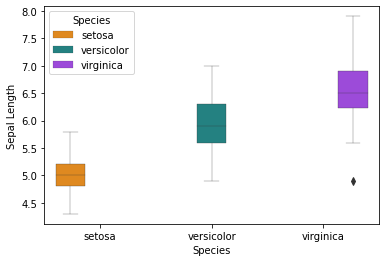

In [53]:
#data = penguins,
g = sns.boxplot(x = 'Species',
            y ='Sepal Length',
            hue = 'Species',
            data = data1,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Species')
g.set_ylabel('Sepal Length')

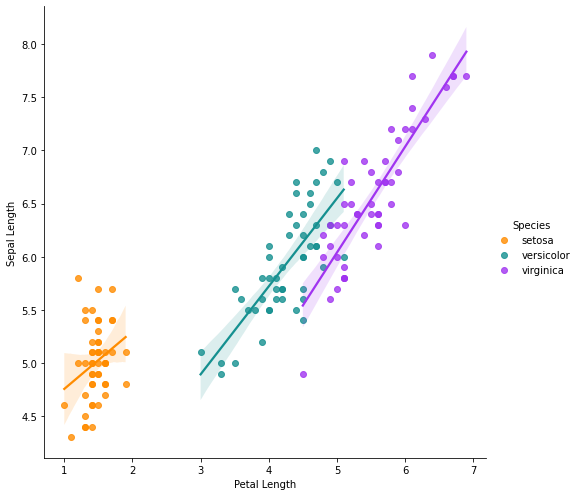

In [54]:
g = sns.lmplot(x="Petal Length",
               y="Sepal Length",
               hue="Species",
               height=7,
               data=data1,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Petal Length')
g.set_ylabels('Sepal Length')

In [55]:
data1.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [56]:
data1.shape

(150, 5)

In [57]:
# Check for null values
print(len(data1) - data1.count())

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64


In [58]:
data1 = data1.dropna()

In [59]:
# Check for null values
print(len(data1) - data1.count())

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64


In [60]:
data1.shape

(150, 5)

In [61]:
# Boxplot for Visualization
#sns.boxplot(data = x_train)

In [62]:
# Scaling using Normalization
min_max_scaler = MinMaxScaler().fit(x_train)
normTrainX = min_max_scaler.transform(x_train)
print('normTrainX', normTrainX.shape)

normTrainX (120, 4)


<AxesSubplot:>

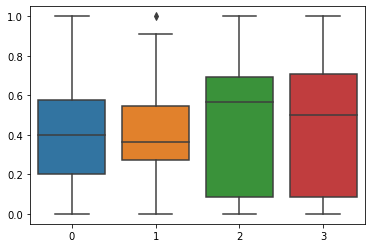

In [63]:
# Boxplot after normalization
sns.boxplot(data = normTrainX)

In [64]:
# features and target
target = data1['Species']
features = data1[['Sepal Length', 'Sepal Width', 'Petal Length',

                       'Petal Width']]

#Sepal Length	Sepal Width	Petal Length	Petal Width	Species

In [65]:
features.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [67]:
# count of unique values in target 
data1['Species'].nunique()

3

In [68]:
# unique values in target
print(data1['Species'].unique())

['setosa' 'versicolor' 'virginica']


In [69]:
#data1['Species'].nunique()

In [70]:
#data1['Species'].unique()

In [71]:
# Convert categorical to numerical so we can use it for correlation
features = pd.get_dummies(features)
target, uniques = pd.factorize(target)

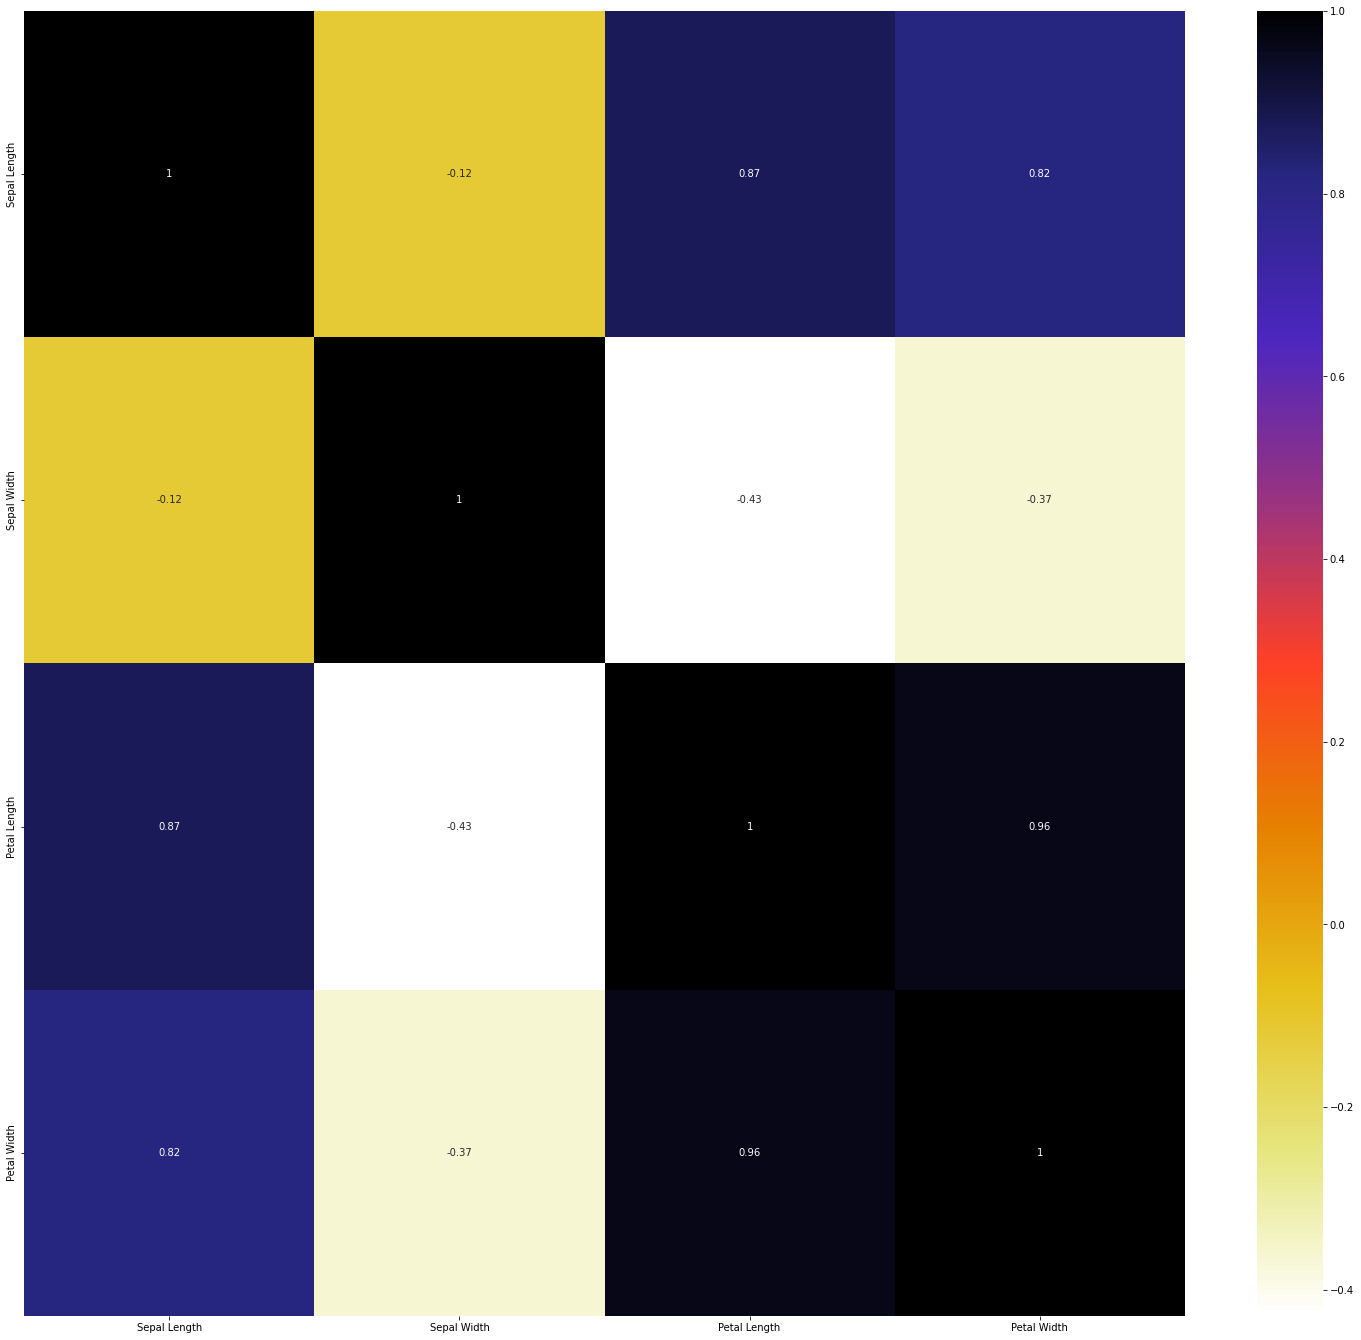

In [72]:
# Heatmap using Pearson Correlation
plt.figure(figsize=(26,24))
cor = features.corr()
#print(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [73]:
# With the following function we can select highly correlated features
def correlation(features, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

# Set the threshold to 0.7
corr_features = correlation(features, 0.5)
len(set(corr_features))

# Get columns with high correlation
print(corr_features)

{'Petal Length', 'Petal Width'}


In [74]:
print('Here is what our unique output variables represent') 
print(uniques)
print('Here is the target') 
print(target)
print('Here are our feature variables') 
print(features.head())

Here is what our unique output variables represent
Index(['setosa', 'versicolor', 'virginica'], dtype='object')
Here is the target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Here are our feature variables
   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [75]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
# split dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(

    features, target, test_size=.2)

In [77]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (120, 4)
x_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


<AxesSubplot:>

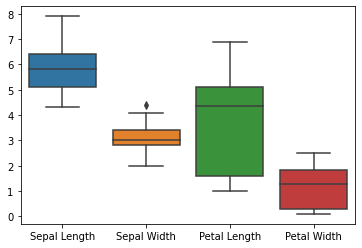

In [78]:
# Boxplot for to Visualize outlier in data
import seaborn as sns
sns.boxplot(data = x_train)

In [79]:
# Scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(x_train)
normTrainX = min_max_scaler.transform(x_train)
print('normTrainX', normTrainX.shape)

normTrainX (120, 4)


<AxesSubplot:>

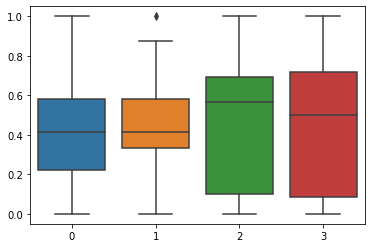

In [80]:
# Boxplot after normalization
sns.boxplot(data = normTrainX)

In [81]:
# useing RandomForestClassifier 
rfc = RandomForestClassifier(random_state=15)
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [82]:
# predictions
y_pred = rfc.predict(x_test)
print(y_pred)

[0 0 1 2 2 2 2 1 1 1 0 2 1 0 0 1 1 1 2 0 2 2 0 1 1 0 1 0 1 1]


In [83]:
print(y_test)

[0 0 1 1 2 2 2 1 1 1 0 2 1 0 0 1 1 1 2 0 2 2 0 1 1 0 2 0 1 1]


In [84]:
# Evaluate the model
score = accuracy_score(y_pred, y_test)
print('Our accuracy score for this model is {}'.format(score))

Our accuracy score for this model is 0.9333333333333333


In [85]:
# accuracy of the model in percent upto 2 floating points
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy*100:.2f}%')

The accuracy is: 93.33%


In [86]:
rfc.classes_

array([0, 1, 2], dtype=int64)

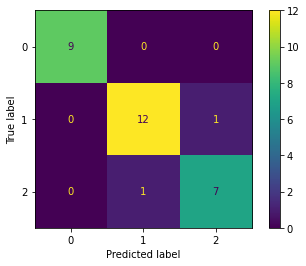

In [87]:
# Print the Confusion Matrix such that the cells of the matrix are colored
# Build and Display Confusion Matrix
# y_test has true target values for test features, 
# y_pred has predicted target values for test features
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [88]:
# Print the Classification Report
# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [89]:
# print the number of correctly classified samples

# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(accuracy_score(y_test, y_pred, normalize=False))

28


In [90]:
# print the fraction of correctly classified samples

# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(accuracy_score(y_test, y_pred)) 

0.9333333333333333


In [91]:
# save the model in pickle file

rf_pickle = open('random_forest_iris.pickle', 'wb')

pickle.dump(rfc, rf_pickle)

rf_pickle.close()

output_pickle = open('output_iris.pickle', 'wb')

pickle.dump(uniques, output_pickle)

output_pickle.close() 